In [23]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

(1080, 1213, 3)


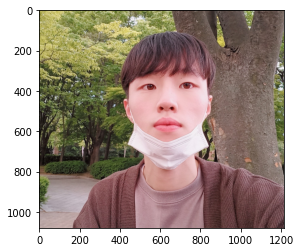

In [32]:
img_path = os.getenv('HOME') + '/aiffel/human_segmentation/images/my_image.png'
img_orig = cv2.imread(img_path)

print(img_orig.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [33]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
# PixelLib가 제공하는 모델의 url
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'
# 다운로드를 시작
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f147cd51160>)

In [34]:
model = semantic_segmentation() #PixelLib 라이브러리에서  semantic segmentation을 수행하는 클래스 인스턴스
model.load_pascalvoc_model(model_file) 

In [35]:
# segmentAsPascalvoc()함수를 호출하여 분할 출력의 배열과 입력된 이미지의 분할을 가져옴
segvalues, output  = model.segmentAsPascalvoc(img_path)

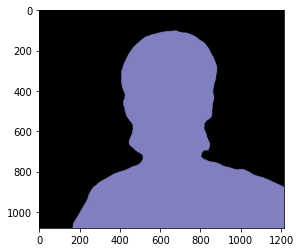

In [37]:
plt.imshow(output) # 입력된 이미지의 분할
plt.show()

In [38]:
segvalues # 분할 출력의 배열

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]])}

In [ ]:
# pascalvoc 데이터의 라벨종류
LABEL_NAMES = ['background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

In [39]:
# segvalues의 class_ids에 담겨있는 값을 통해 pacalvoc 라벨을 출력함.
for class_id in segvalues['class_ids']:
    print( LABEL_NAMES[ class_id ] )

background
person


In [14]:
#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype=int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>=3
    
colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

(1080, 1213)


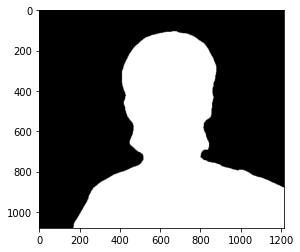

In [41]:
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

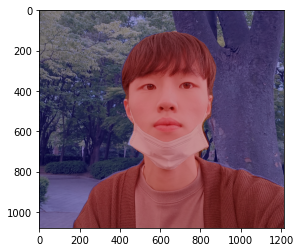

In [42]:
img_show = img_orig.copy()
img_mask = seg_map.astype(np.uint8) * 255  # True와 False인 값을 각각 255과 0으로 바꿔줌.
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET) # 255와 0을 적당한 색상으로 바꿈.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)  # 원본 이미지와 마스크를 적당한 비율로 합침.
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

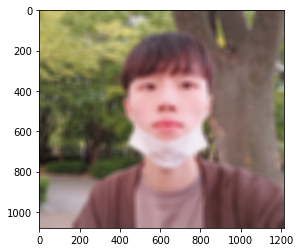

In [50]:
img_orig_blur = cv2.blur(img_orig, (30,30))
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

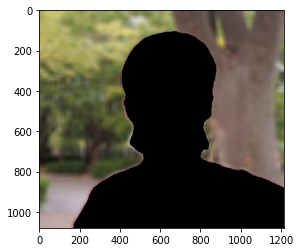

In [51]:
# 흐려진 이미지에서 세그멘테이션 마스크를 이용해서 배경만 추출
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color) # 이미지가 반전됨.
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)  # 배경만 있는 이미지를 얻음.
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

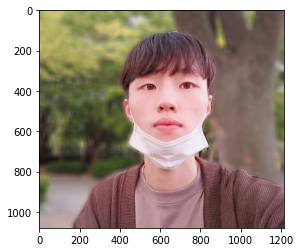

In [52]:
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 아닌 영역은 블러된 이미지 값을 사용
img_concat = np.where(img_mask_color == 255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()